In [2]:
import sys
sys.path.append('../')
import utils
import models
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 

import tensorflow as tf 
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

model = models.build_model(None, None, 3)

x_data, y_data = utils.load_dataset_sice()
   
keys = list(x_data.keys())

1 Physical GPUs, 1 Logical GPUs
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 64)    1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 64)    36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, None, None, 64)    0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 128)   73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 128)   147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling

In [11]:
model.load_weights('./weights/my_model.140-0.03.hdf5')

Text(0.5, 1.0, 'gt')

<Figure size 432x288 with 0 Axes>

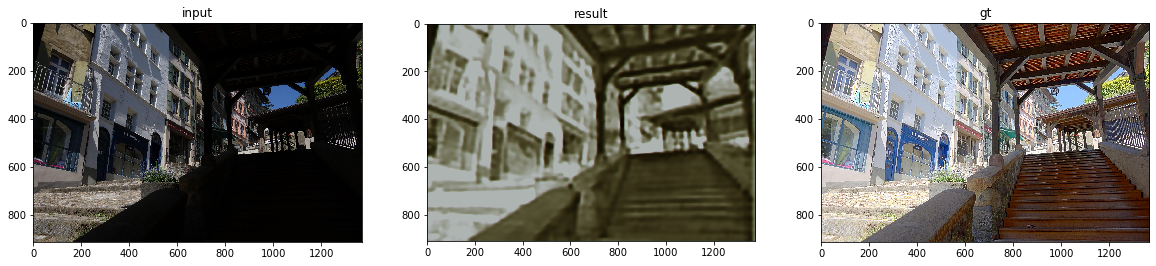

In [12]:

index = 10
x_test_img = cv2.imread(x_data[keys[index]])     
y_test_img = cv2.imread(y_data[keys[index]]) 

# resize_
height, width = x_test_img.shape[:2]

x_test_img = cv2.resize(x_test_img, dsize=(width//4, height//4), interpolation=cv2.INTER_CUBIC) / 255.0
y_test_img = cv2.resize(y_test_img, dsize=(width//4, height//4), interpolation=cv2.INTER_CUBIC) / 255.0
# epand dim
x_test_img = np.expand_dims(x_test_img, axis=0)
# inference (prediction)
result = model.predict(x_test_img)
# bgr2rgb (to disply)
result_rgb = result.squeeze()[:,:,::-1]
x_test_img_rgb = x_test_img.squeeze()[:,:,::-1]
y_test_img_rgb = y_test_img[:,:,::-1]

plt.figure() 
fig, axs = plt.subplots(1, 3,figsize = (20,13))
axs[0].imshow(x_test_img_rgb)
axs[0].set_title('input')
axs[1].imshow(result_rgb)
axs[1].set_title('result')
axs[2].imshow(y_test_img_rgb)
axs[2].set_title('gt')

In [13]:
cv2.imwrite('./test_result/140/input.bmp', np.uint8(x_test_img_rgb[:,:,::-1] * 255))
cv2.imwrite('./test_result/140/gt.bmp', np.uint8(y_test_img_rgb[:,:,::-1] * 255))
cv2.imwrite('./test_result/140/result.bmp', np.uint8(result_rgb[:,:,::-1] * 255))

True